In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
train_set = pd.read_csv(url, header = None)

In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']


In [5]:
train_set.columns = col_labels

In [6]:
test_set.columns = col_labels


In [7]:
train_set.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
train_set.shape

(32561, 15)

In [9]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [10]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
train_set['wage_class'] = le.fit_transform(train_set['wage_class'])

In [14]:
train_set['wage_class'].unique()


array([0, 1])

In [15]:
data = train_set.iloc[:, [1,3,5,6,7,8,9,13]]

In [16]:
train_set['education'] = le.fit_transform(train_set['education'])
train_set['workclass'] = le.fit_transform(train_set['workclass'])
train_set['marital_status'] = le.fit_transform(train_set['marital_status'])
train_set['occupation'] = le.fit_transform(train_set['occupation'])
train_set['relationship'] = le.fit_transform(train_set['relationship'])
train_set['race'] = le.fit_transform(train_set['race'])
train_set['sex'] = le.fit_transform(train_set['sex'])
train_set['native_country'] = le.fit_transform(train_set['native_country'])

In [17]:
test_set['education'] = le.fit_transform(test_set['education'])
test_set['workclass'] = le.fit_transform(test_set['workclass'])
test_set['marital_status'] = le.fit_transform(test_set['marital_status'])
test_set['occupation'] = le.fit_transform(test_set['occupation'])
test_set['relationship'] = le.fit_transform(test_set['relationship'])
test_set['race'] = le.fit_transform(test_set['race'])
test_set['sex'] = le.fit_transform(test_set['sex'])
test_set['native_country'] = le.fit_transform(test_set['native_country'])
test_set['wage_class'] = le.fit_transform(test_set['wage_class'])

In [18]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [19]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [20]:
train_set.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


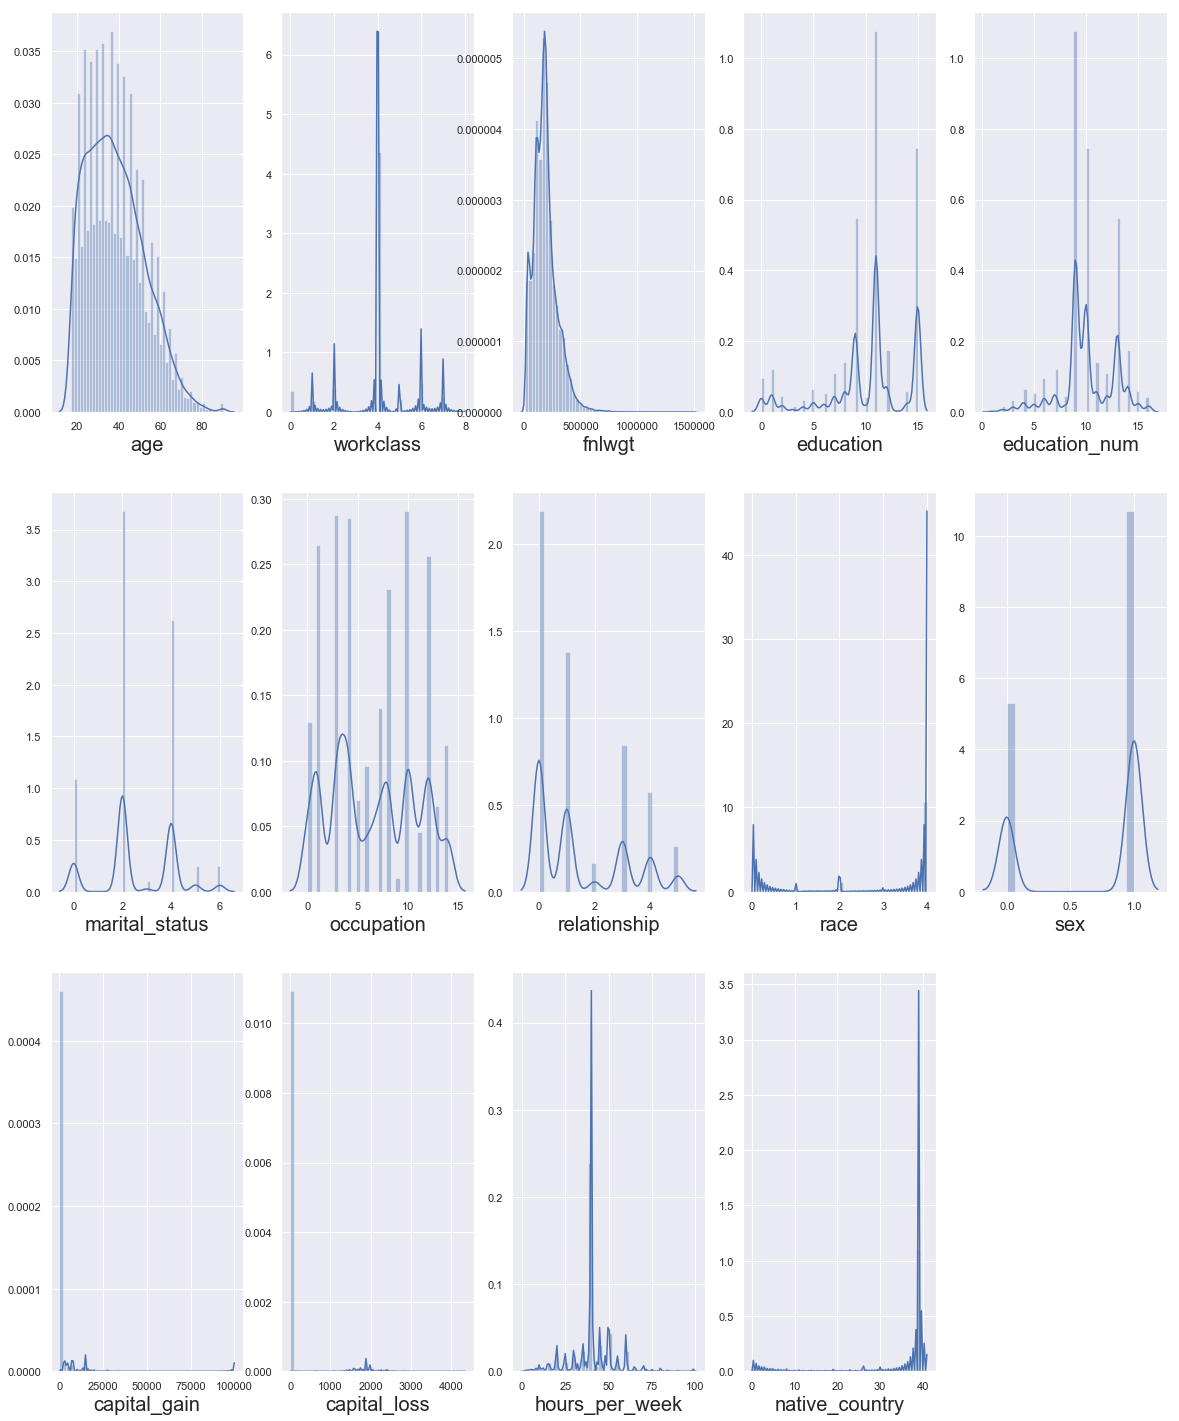

In [21]:
# distribution of data

plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1

for columns in train_set:
    if plotnumber<=14:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(train_set[columns])
        plt.xlabel(columns, fontsize=20)
    plotnumber += 1
plt.show()

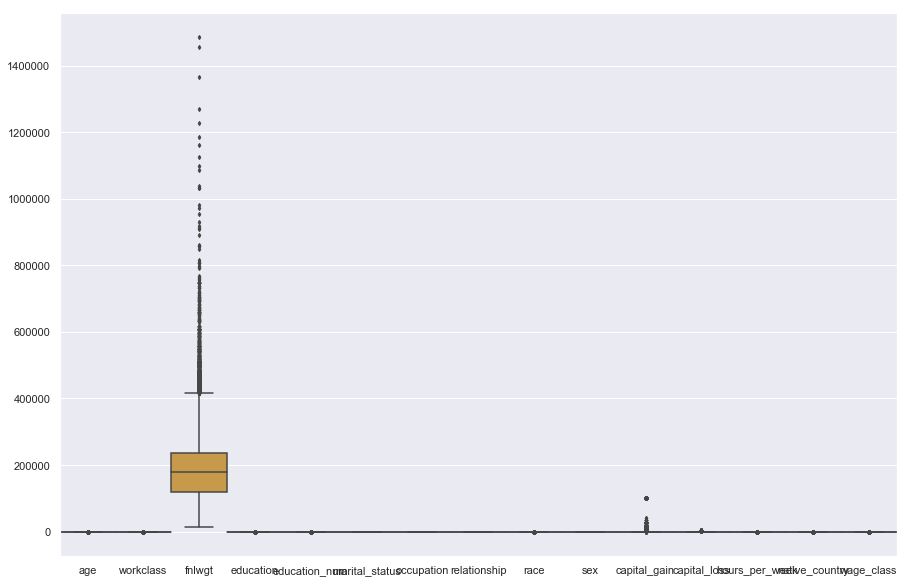

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=train_set, width=1, ax=ax, fliersize=3)
plt.show()

In [23]:
X = train_set.drop(columns = ['wage_class'])
y = train_set['wage_class']

In [24]:
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
X_scaled

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.160401,age
1,1.093928,workclass
2,1.012309,fnlwgt
3,1.159282,education
4,1.218368,education_num
5,1.127439,marital_status
6,1.091768,occupation
7,1.682667,relationship
8,1.038279,race
9,1.559434,sex


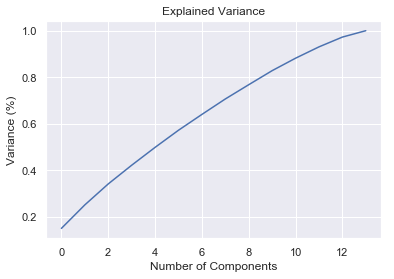

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [28]:
pca = PCA(n_components=12)
new_data = pca.fit_transform(X_scaled)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC 1', 'PC 2','PC 3','PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12'])

In [29]:
principal_Df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12
0,0.734137,-0.500869,-0.360724,-0.758721,-0.217926,0.224261,-1.080382,0.503062,0.253312,0.525576,1.957156,0.655879
1,0.822699,-0.046250,0.503321,-0.712125,-0.861139,0.022106,-0.606755,0.183485,-1.906828,0.517968,1.423624,-0.691673
2,0.941948,0.476405,0.502384,-0.351178,-0.120312,0.219219,0.516390,-0.936835,0.163375,-0.016744,0.080880,-1.185071
3,0.336345,2.833790,-0.063730,0.895815,-0.728325,0.087423,-0.017069,0.013941,-0.212566,-1.934338,0.185041,0.248765
4,-2.120241,-0.586815,-2.077780,4.047745,-0.401419,-0.446002,0.935990,-1.010041,0.336447,1.446779,-1.023601,-0.331329


In [30]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(principal_Df,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
# cheking training accuracy
y_pred = model.predict(principal_Df)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y,predictions)
accuracy

0.8477626608519394

In [32]:
test_x = test_set.drop(columns = ['wage_class'])
test_y = test_set['wage_class']

In [33]:
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()
test_x_scaled = scalar.fit_transform(test_x)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(test_x_scaled)

In [35]:
pca = PCA(n_components=12)
new_data = pca.fit_transform(test_x_scaled)
# This will be the new data fed to the algorithm.
principal_test_Df = pd.DataFrame(data = new_data
             , columns = ['PC 1', 'PC 2','PC 3','PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12'])

In [36]:
# cheking initial test accuracy
y_pred = model.predict(principal_test_Df)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.7966341133836988

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [39]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [40]:
grid.fit(principal_Df,y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.8209876543209876, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.8277132854247282, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.8302773426702295, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.8317670904735581, total=   1.4s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.834070388796757, total=   1.4s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.8388464019165208, total=   1.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.8374792703150912, total=   2.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.8414409434309932, total=   3.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   le

[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.834070388796757, total=   1.8s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.5, max_depth=3, n_estimators=50, score=0.8388464019165208, total=   1.8s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.8374792703150912, total=   3.9s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.8414409434309932, total=   3.6s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.8443748272367088, total=   3.6s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=3, n_estimators=200, score=0.8387691173760825, total=   7.3s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ...........

[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.8388464019165208, total=   1.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.8374792703150912, total=   3.3s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.8414409434309932, total=   3.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.8443748272367088, total=   3.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.8387691173760825, total=   6.4s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.8442970333517598, total=   6.5s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 .........

[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.8374792703150912, total=   3.0s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.8414409434309932, total=   3.2s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.8443748272367088, total=   3.2s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0.8387691173760825, total=   6.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0.8442970333517598, total=   6.3s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0.8485211462268497, total=   5.9s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=10 ..

[CV]   learning_rate=0.001, max_depth=3, n_estimators=100, score=0.8414409434309932, total=   3.2s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=100, score=0.8443748272367088, total=   3.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.8387691173760825, total=   6.6s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.8442970333517598, total=   7.0s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.8485211462268497, total=   6.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.8287267366869356, total=   0.5s
[CV]  learning_rate=0.001, max_depth=5, n_estimators

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 36.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': [3, 5, 10, 20], 'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [41]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [42]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 200)
new_model.fit(principal_Df,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
y_pred_new = new_model.predict(principal_test_Df)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new

0.7304833855414287

In [44]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [45]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }

In [46]:
def hyperparameter_tuning(space):
    model = xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = space['reg_alpha'],min_child_weight=space['min_child_weight'],
                                             colsample_bytree=space['colsample_bytree'])
    evaluation = [( principal_Df, y), ( principal_test_Df, test_y)]
    
    model.fit(principal_Df, y,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(principal_test_Df)
    accuracy = accuracy_score(test_y, pred>0.5)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

In [47]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

SCORE:                                                                                                                 
0.7980468030219274                                                                                                     
SCORE:                                                                                                                 
0.8027148209569437                                                                                                     
SCORE:                                                                                                                 
0.8019777654935201                                                                                                     
SCORE:                                                                                                                 
0.8038818254406978                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8015478164731896                                                                                                     
SCORE:                                                                                                                 
0.8067686260057736                                                                                                     
SCORE:                                                                                                                 
0.8068300472943922                                                                                                     
SCORE:                                                                                                                 
0.80603157054235                                                                                                       
SCORE:                                  

SCORE:                                                                                                                 
0.809225477550519                                                                                                      
SCORE:                                                                                                                 
0.8086726859529513                                                                                                     
SCORE:                                                                                                                 
0.8088569498188072                                                                                                     
SCORE:                                                                                                                 
0.8067686260057736                                                                                                     
SCORE:                                  